In [90]:
def find_isosurface(array, target_value, zs, interp_order=6, power_parameter=0.5):
    # NOTE: array and zs must be arranged such that we are looking for the isosurface along axis=2 (the 3rd dimension)
    if interp_order < 1: interp_order = 1
    from numpy import argsort, take, clip, zeros, nan
    dist = (array - target_value)**2 # Determine squared distance of each point from target value
    arg = argsort(dist,axis=2) # Along 3rd dimension, determine the order of distances from the target value
    dist.sort(axis=2) # Sort the squared distance
    w_total = 0.
    z = zeros(array.shape[:2], dtype=float)
    for i in xrange(int(interp_order)): # Iterate through i closest points
        zi = take(zs, arg[:,:,i]) # Get z value at this point
        valuei = dist[:,:,i] # Get distance from target value at this point
        wi = 1/valuei # Reciprocal of distance
        clip(wi, 0, 1.e6, out=wi) # Cap reciprocal
        w_total += wi**power_parameter # Sum up squared distances
        z += zi*wi**power_parameter # Sum up the z values, weighted by the squared distances
    z /= w_total # Target z is weighted average of closest z's
    # FOR GEOPHYSICAL DATA, TARGET SURFACE NOT ALWAYS PRESENT
    z[arg[:,:,0]==0]=nan # No array data at this location (e.g. land point) or array monotonically increasing and target surface not present
    z[array[:,:,0]>target_value]=nan # Target surface outcropped to surface
    z[array.max(axis=2)<target_value]=nan # Target surface outcropped to bathymetry
    return z

/home/oceansoft/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide
/home/oceansoft/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide


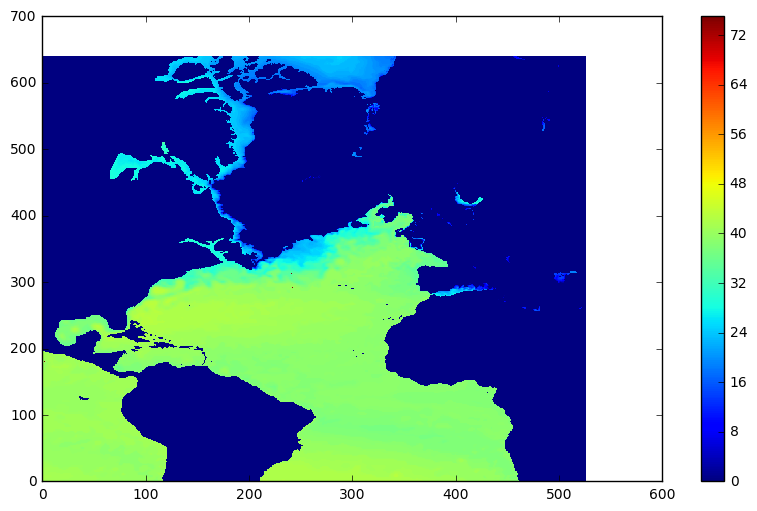

In [89]:
if __name__ == "__main__":
    # Testing find_isosurface function
    from numpy import meshgrid, sin, cos, pi, linspace, arange, transpose
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    %matplotlib inline
    from netCDF4 import Dataset

    dataR = Dataset('/home/ocean2/graemem/ariane/data_link/5d/ORCA025.L75-GJM189_3815_gridRn.nc','r')
    my_array = transpose(dataR.variables['vosigntr'][0,:,:,:],(2,1,0))
    [nx,ny,nz] = my_array.shape
    xs = arange(nx)
    ys = arange(ny)
    zs = arange(nz)
    X,Y,Z = meshgrid( xs, ys, zs)

    z, arg, dist = find_isosurface(my_array, 27, zs=zs, interp_order=3)

    plt.figure(figsize=(10,6))
    #plt.pcolormesh(transpose(my_array.max(axis=2)))#,levels=[26,26.5,27,27.5,28])#,vmin=0,vmax=75)
    #plt.pcolormesh(transpose(dist[:,:,0]))
    plt.pcolormesh(transpose(z),vmin=0,vmax=75)
    plt.colorbar()